In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-for-dummy-bank/loan_final313.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_csv('/kaggle/input/loan-data-for-dummy-bank/loan_final313.csv')

### Real Feature in data 

* year : 대출 발생 연도
* issue_d : 대출 발생 일자
* final_d : 마지막 거래일자
* emp_length_int : "근속년수. 0은 1년 미만, 10은 10년 이상"
* home_ownership : "등록 시 대출자에게서 제공된 집 보유 상태. RENT(대여) = 1, OWN(소유) = 2, MORTAGE(담보대출) = 3 "
* home_ownership_cat : ;;
* income_category : "수익 Low = 1, Medium = 2, High = 3 으로 분류"
* annual_inc : 등록시 대출자에게서 제공된 연간 소득
* income_cat : ;;
* loan_amount : 대출금액(달러)
* term : "대출기간(36개월 = 1, 60개월 = 2)"
* term_cat : ;;
* application_type : "개인 대출 신청(=1) 인지, 2명의 대출자에 의해 공동으로 신청된 대출 신청 (=2)인지 여부"
* application_type_cat : ;;
* purpose : 대출이유
* purpose_cat : "대출용도(빛 청산, 카드 대금 결제, 집 개발 등등) 
[credit_card = 1, car = 2, small_business = 3, other = 4, wedding = 5, debt_consolidation =6, 
home_improvement = 7, major_purchase = 8, medical = 9, moving = 10, vacation = 11, house =12,
renewable_energy = 13,  educational = 14]"
* interest_payments : "이자 지불? (Low = 1, High =2 로 분류)"
* interest_payments_cat : ;;
* loan_condition : 대출의 상태(TARGET) (Good Loan = 0 , Bad Loan = 1)
* loan_condition_cat : ;;
* interest_rate : 대출의 이자율
* grade : 대출 등급 ( A ~ G , 1~7)
* grade_cat : ;;
* dti : 금융부채 상환능력을 소득으로 따져서 대출한도를 정하는 계산비율
* total_pymnt : 총 상환금액
* total_rec_prncp : ???
* recoveries : 회수
* installment : 분할 불입금
* region : 거래지역


In [81]:
df.head()

id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01/12/2011  1012015            10.0           RENT   
1  1077430  2011  01/12/2011  1042013             0.5           RENT   
2  1077175  2011  01/12/2011  1062014            10.0           RENT   
3  1076863  2011  01/12/2011  1012015            10.0           RENT   
4  1075358  2011  01/12/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  ...  \
0                   1             Low       24000           1  ...   
1                   1             Low       30000           1  ...   
2                   1             Low       12252           1  ...   
3                   1             Low       49200           1  ...   
4                   1             Low       80000           1  ...   

   loan_condition_cat interest_rate  grade grade_cat    dti   total_pymnt  \
0                   0         10.65      B         2  27.65   5861.071414   
1                   1         15.27      C         3   1.00   1008.710000   
2                   0         15.96      C         3   8.72   3003.653644   
3                   0         13.49      C         3  20.00  12226.302210   
4                   0         12.69      B         2  17.94   3242.170000   

   total_rec_prncp recoveries  installment    region  
0          5000.00       0.00       162.87   munster  
1           456.46     117.08        59.83  leinster  
2          2400.00       0.00        84.33  cannught  
3         10000.00       0.00       339.31    ulster  
4          2233.10       0.00        67.79    ulster  

[5 rows x 30 columns]

In [82]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [84]:
df.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [93]:
## Check how imbalanced TARGET is
df['loan_condition'].value_counts()

Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

In [92]:
# to recognize what is designated as _cat
df3 = df.loc[df['grade'] == 'G']
df3['grade_cat'].head()

223    7
540    7
602    7
618    7
735    7
Name: grade_cat, dtype: int64

## Data Visualization

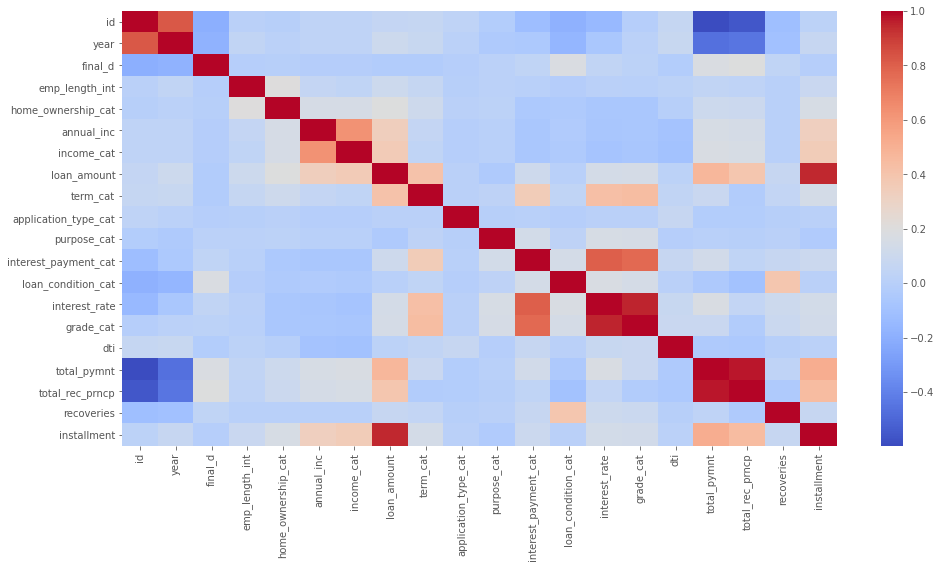

In [101]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap = 'coolwarm')

**Drop Meaningless columns**

In [99]:
df_for_use = df.drop(['id','final_d', 'year','loan_condition', 'issue_d', 'home_ownership', 'income_category', 
              'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade', 'region'],axis=1 )

In [100]:
df_for_use.head()

emp_length_int  home_ownership_cat  annual_inc  income_cat  loan_amount  \
0            10.0                   1       24000           1         5000   
1             0.5                   1       30000           1         2500   
2            10.0                   1       12252           1         2400   
3            10.0                   1       49200           1        10000   
4             1.0                   1       80000           1         3000   

   term_cat  application_type_cat  purpose_cat  interest_payment_cat  \
0         1                     1            1                     1   
1         2                     1            2                     2   
2         1                     1            3                     2   
3         1                     1            4                     2   
4         2                     1            4                     1   

   loan_condition_cat  interest_rate  grade_cat    dti   total_pymnt  \
0                   0          10.65          2  27.65   5861.071414   
1                   1          15.27          3   1.00   1008.710000   
2                   0          15.96          3   8.72   3003.653644   
3                   0          13.49          3  20.00  12226.302210   
4                   0          12.69          2  17.94   3242.170000   

   total_rec_prncp  recoveries  installment  
0          5000.00        0.00       162.87  
1           456.46      117.08        59.83  
2          2400.00        0.00        84.33  
3         10000.00        0.00       339.31  
4          2233.10        0.00        67.79

In [96]:
X = df.drop(['id','final_d', 'year','loan_condition', 'issue_d', 'home_ownership', 'income_category', 
              'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition','loan_condition_cat', 'grade', 'region'],axis=1 )
Y = df['loan_condition_cat']

In [97]:
X.head()

emp_length_int  home_ownership_cat  annual_inc  income_cat  loan_amount  \
0            10.0                   1       24000           1         5000   
1             0.5                   1       30000           1         2500   
2            10.0                   1       12252           1         2400   
3            10.0                   1       49200           1        10000   
4             1.0                   1       80000           1         3000   

   term_cat  application_type_cat  purpose_cat  interest_payment_cat  \
0         1                     1            1                     1   
1         2                     1            2                     2   
2         1                     1            3                     2   
3         1                     1            4                     2   
4         2                     1            4                     1   

   interest_rate  grade_cat    dti   total_pymnt  total_rec_prncp  recoveries  \
0          10.65          2  27.65   5861.071414          5000.00        0.00   
1          15.27          3   1.00   1008.710000           456.46      117.08   
2          15.96          3   8.72   3003.653644          2400.00        0.00   
3          13.49          3  20.00  12226.302210         10000.00        0.00   
4          12.69          2  17.94   3242.170000          2233.10        0.00   

   installment  
0       162.87  
1        59.83  
2        84.33  
3       339.31  
4        67.79

In [98]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: loan_condition_cat, dtype: int64

In [ ]:
#### Export


df_for_use.to_pickle('df_for_use.pkl')